In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, classification_report, f1_score,accuracy_score,confusion_matrix,mean_absolute_error
import seaborn as sns
%matplotlib inline


---
# Data Cleaning and Preprocessing

In [ ]:
data = pd.read_csv("updated_data_new.csv")
revenue_mean = data['Revenue (Millions)'].mean()
meta_mean = data['Metascore'].mean()
data['Revenue (Millions)'].fillna((revenue_mean), inplace=True)
data['Metascore'].fillna((revenue_mean), inplace=True)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
 12  rating_category     1000 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 101.7+ KB


In [ ]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,60.519208
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.640161
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,61.000000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,75.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_category
0,1,Guardians of the Galaxy,Action,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Good
1,2,Prometheus,Adventure,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Average
2,3,Split,Horror,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
3,4,Sing,Animation,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Average
4,5,Suicide Squad,Action,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Average


In [ ]:
data['Genre'].value_counts()
data['Genre'].unique()

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Mystery', 'Thriller'], dtype=object)

In [ ]:
id_Genre = LabelEncoder()
data['Genre'] = id_Genre.fit_transform(data['Genre'])
data['Genre'].unique()

array([0, 1, 7, 2, 4, 3, 6, 5, 8, 9])

In [ ]:
X_cls = data.drop(["Title","Rank", "Description" , "Director" , "Actors", "Year" , "rating_category" ], axis=1)
y_cls = data["rating_category"]

X_reg = data.drop([ "Title" ,"Rank", "Description" , "Director" , "Actors", "Year" , "rating_category", "Rating" ], axis=1)
y_reg =data["Rating"]
X_reg.head()

,Genre,Runtime (Minutes),Votes,Revenue (Millions),Metascore
0,0,121,757074,333.13,76.0
1,1,124,485820,126.46,65.0
2,7,117,157606,138.12,62.0
3,2,108,60545,270.32,59.0
4,0,123,393727,325.02,40.0


In [ ]:
#Normalize the data
scaler = StandardScaler()
X_norm_z = scaler.fit_transform(X_cls)
# Split the data into train and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_norm_z, y_cls, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg.values, y_reg.values, test_size=0.2, random_state=42)

# Data Visualization

# Classification Model 

In [ ]:
# k = 5
param_grid = {'n_neighbors': range(1, 15)}
knn = KNeighborsClassifier()

# perform grid search cross-validation
grid_search_5 = GridSearchCV(knn, param_grid, cv=5)
grid_search_5.fit(X_train_cls, y_train_cls)

# get the best parameter
best_n_neighbors_5 = grid_search_5.best_params_['n_neighbors']

# create a KNN classifier with the best parameter
knn_best_5 = KNeighborsClassifier(n_neighbors=best_n_neighbors_5)
knn_best_5.fit(X_train_cls, y_train_cls)

# predict the class labels on the test data using the best model
y_pred_cls_5 = knn_best_5.predict(X_test_cls)

# calculate the F1 score of the best model
f1_5 = f1_score(y_test_cls, y_pred_cls_5, average='weighted')
accuracy_5 = accuracy_score(y_test_cls, y_pred_cls_5)

# print the best parameter and F1 score
print("Best number of neighbors:", best_n_neighbors_5)
print("F1 score of the best model:", f1_5)
print("Accuracy of the best model:", accuracy_5)

Best number of neighbors: 7
F1 score of the best model: 0.80770623492694
Accuracy of the best model: 0.81


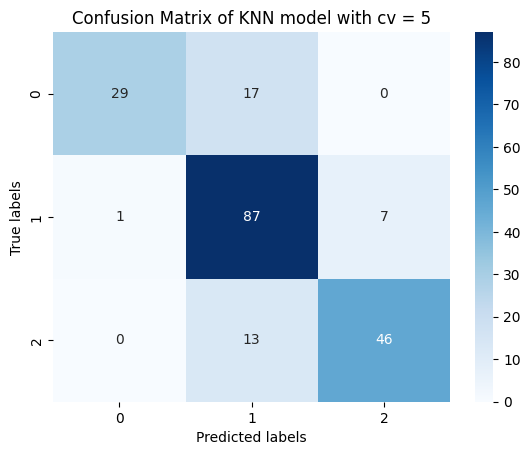

In [ ]:
# predict the class labels on the test data using the best model
y_pred_cls_5 = knn_best_5.predict(X_test_cls)

# create the confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls_5)

# create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# set the axis labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of KNN model with cv = 5")

# show the plot
plt.show()

In [ ]:
# k = 10
grid_search_10 = GridSearchCV(knn, param_grid, cv=10)
grid_search_10.fit(X_train_cls, y_train_cls)

# get the best parameter
best_n_neighbors_10 = grid_search_10.best_params_['n_neighbors']

# create a KNN classifier with the best parameter
knn_best_10 = KNeighborsClassifier(n_neighbors=best_n_neighbors_10)
knn_best_10.fit(X_train_cls, y_train_cls)

# predict the class labels on the test data using the best model
y_pred_cls_10 = knn_best_10.predict(X_test_cls)

# calculate the F1 score of the best model
f1_10 = f1_score(y_test_cls, y_pred_cls_10, average='weighted')
accuracy_10 = accuracy_score(y_test_cls, y_pred_cls_10)

# print the best parameter and F1 score
print("Best number of neighbors:", best_n_neighbors_10)
print("F1 score of the best model:", f1_10)
print("Accuracy of the best model:", accuracy_10)

Best number of neighbors: 5
F1 score of the best model: 0.8253161849663192
Accuracy of the best model: 0.825


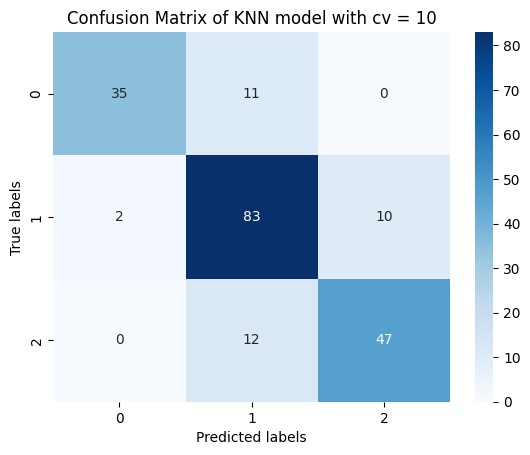

In [ ]:
# predict the class labels on the test data using the best model
y_pred_cls_10 = knn_best_10.predict(X_test_cls)

# create the confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls_10)

# create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# set the axis labels and title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix of KNN model with cv = 10")

# show the plot
plt.show()

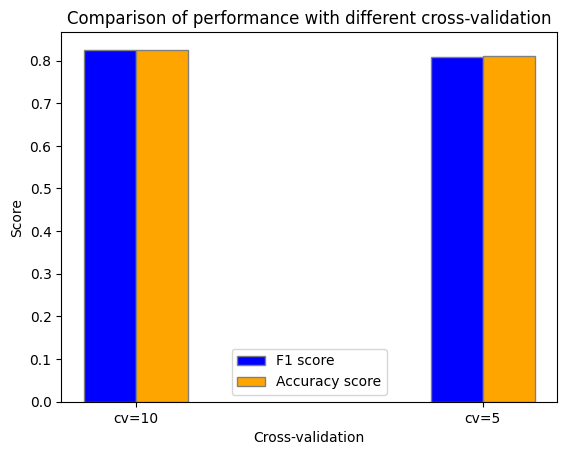

In [ ]:
# calculate F1 score and accuracy for cv=10 and cv=5
f1_scores = [f1_10, f1_5]
accuracy_scores = [accuracy_10, accuracy_5]

# set the width of the bars
bar_width = 0.15

# set the positions of the bars on the x-axis
r1 = np.arange(len(f1_scores))
r2 = [x + bar_width for x in r1]

# plot the F1 score and accuracy score for cv=10 and cv=5
plt.bar(r1, f1_scores, color='blue', width=bar_width, edgecolor='grey', label='F1 score')
plt.bar(r2, accuracy_scores, color='orange', width=bar_width, edgecolor='grey', label='Accuracy score')

# add labels, title and legend to the plot
plt.xlabel('Cross-validation')
plt.ylabel('Score')
plt.xticks([r + bar_width/2 for r in range(len(f1_scores))], ['cv=10', 'cv=5'])
plt.title('Comparison of performance with different cross-validation')
plt.legend()

# show the plot
plt.show()

with cv = 10, the accuracy and f1-score is a little bit higher than with cv = 5, So i will choose the KNN model with the cross-validation = 10

# Regression Model

## Decision Tree

In [ ]:
def Evaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(
        f"""Test error
        {model.__class__.__name__}:
        MAE = {mean_absolute_error(y_test, y_pred):.3f}
        MSE = {mean_squared_error(y_test, y_pred):.3f}
        R^2 = {model.score(X_test,y_test):.3f}
        """
    )

In [ ]:
DecisionTree = DecisionTreeRegressor(random_state=42)

DecisionTree.fit(X_train_reg, y_train_reg)

Evaluation(DecisionTree, X_test_reg, y_test_reg)

Test error
        DecisionTreeRegressor:
        MAE = 0.713
        MSE = 0.923
        R^2 = 0.037
        


In [ ]:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
param_grid = {'criterion':criterion}

DecisionTree = GridSearchCV(DecisionTreeRegressor(random_state=42),
                            param_grid=param_grid,
                            n_jobs = -1)

best_DecisionTree = DecisionTree.fit(X_train_reg, y_train_reg)
print(DecisionTree.best_params_)

Evaluation(best_DecisionTree, X_test_reg, y_test_reg)

{'criterion': 'friedman_mse'}
Test error
        GridSearchCV:
        MAE = 0.706
        MSE = 0.911
        R^2 = 0.049
        


In [ ]:
num_leafs = [5, 10, 50, 100]
param_grid = {'min_samples_leaf':num_leafs}

DecisionTree = GridSearchCV(DecisionTreeRegressor(random_state=42,
                                                  criterion = 'friedman_mse'),
                            param_grid=param_grid,
                            n_jobs = -1)

best_DecisionTree = DecisionTree.fit(X_train_reg, y_train_reg)
print(DecisionTree.best_params_)

Evaluation(best_DecisionTree, X_test_reg, y_test_reg)

{'min_samples_leaf': 10}
Test error
        GridSearchCV:
        MAE = 0.561
        MSE = 0.583
        R^2 = 0.392
        


In [ ]:
depths = np.arange(1, 25)

param_grid = {'max_depth':depths}

DecisionTree = GridSearchCV(DecisionTreeRegressor(random_state=42,
                                                  criterion = 'friedman_mse',
                                                  min_samples_leaf = 10),
                            param_grid=param_grid,
                            n_jobs = -1)

best_DecisionTree = DecisionTree.fit(X_train_reg, y_train_reg)
print(DecisionTree.best_params_)

Evaluation(best_DecisionTree, X_test_reg, y_test_reg)

{'max_depth': 4}
Test error
        GridSearchCV:
        MAE = 0.570
        MSE = 0.598
        R^2 = 0.376
        


In [ ]:
DecisionTree = DecisionTreeRegressor(random_state=42,
                                     criterion = 'friedman_mse',
                                     min_samples_leaf = 10)

best_DecisionTree = DecisionTree.fit(X_train_reg, y_train_reg)

Evaluation(best_DecisionTree, X_test_reg, y_test_reg)

Test error
        DecisionTreeRegressor:
        MAE = 0.561
        MSE = 0.583
        R^2 = 0.392
        


## Random Forest

In [ ]:
RandomForest = RandomForestRegressor(random_state = 42)
RandomForest.fit(X_train_reg, y_train_reg)

Evaluation(RandomForest, X_test_reg, y_test_reg)

Test error
        RandomForestRegressor:
        MAE = 0.501
        MSE = 0.478
        R^2 = 0.501
        


In [ ]:
n_estimators = [50, 100, 200, 500]
param_grid = {'n_estimators':n_estimators}

RandomForest = GridSearchCV(RandomForestRegressor(random_state = 42),
                            param_grid,
                            n_jobs = -1)
best_RandomForest = RandomForest.fit(X_train_reg,y_train_reg)
print(RandomForest.best_params_)

Evaluation(best_RandomForest, X_test_reg, y_test_reg)

{'n_estimators': 500}
Test error
        GridSearchCV:
        MAE = 0.496
        MSE = 0.474
        R^2 = 0.506
        


In [ ]:
depths = np.arange(1, 21)
param_grid = {'max_depth':depths}

RandomForest = GridSearchCV(RandomForestRegressor(random_state = 42,
                                                  n_estimators = 500),
                            param_grid,
                            n_jobs = -1)
best_RandomForest = RandomForest.fit(X_train_reg,y_train_reg)
print(RandomForest.best_params_)

Evaluation(best_RandomForest, X_test_reg, y_test_reg)

{'max_depth': 6}
Test error
        GridSearchCV:
        MAE = 0.490
        MSE = 0.465
        R^2 = 0.515
        


In [ ]:
num_leafs = [5, 10, 50, 100]
param_grid = {'min_samples_leaf':num_leafs}

RandomForest = GridSearchCV(RandomForestRegressor(random_state = 42,
                                                  n_estimators = 500,
                                                  max_depth = 6),
                            param_grid,
                            n_jobs = -1)
best_RandomForest = RandomForest.fit(X_train_reg,y_train_reg)
print(RandomForest.best_params_)

Evaluation(best_RandomForest, X_test_reg, y_test_reg)

{'min_samples_leaf': 5}
Test error
        GridSearchCV:
        MAE = 0.486
        MSE = 0.459
        R^2 = 0.521
        


In [ ]:
RandomForest = RandomForestRegressor(random_state = 42,
                                     n_estimators = 500,
                                     max_depth = 6,
                                     min_samples_leaf = 5,
                                     n_jobs = -1)

best_RandomForest = RandomForest.fit(X_train_reg,y_train_reg)

Evaluation(best_RandomForest, X_test_reg, y_test_reg)

Test error
        RandomForestRegressor:
        MAE = 0.486
        MSE = 0.459
        R^2 = 0.521
        


## Model Evaluation:

In [ ]:
y_predDT = best_DecisionTree.predict(X_test_reg)
y_predRF = best_RandomForest.predict(X_test_reg)

pred_test = np.array([y_predDT,y_predRF,y_test_reg]).T
pd.DataFrame(pred_test,columns=['Decision Tree','Radom Forest','True Value']).head()

,Decision Tree,Radom Forest,True Value
0,6.666667,6.560868,5.3
1,7.135294,6.805487,7.1
2,6.073684,6.174553,5.4
3,6.875000,7.037910,7.0
4,6.875000,6.802708,6.5


In [ ]:
predict = np.array([0,120,757000,333,75]).reshape(1,-1) # Close to Movie Guardians of the Galaxy which have 8.1 IMDB Score

DT_pred = best_DecisionTree.predict(predict)
RF_pred = best_RandomForest.predict(predict)

pred = np.array([DT_pred,RF_pred,[8.1]]).T
pd.DataFrame(pred,columns=['Decision Tree','Radom Forest','True Value'])

,Decision Tree,Radom Forest,True Value
0,8.35,8.090513,8.1


In [ ]:
z = np.array([['Action', 120 ,757000 ,333, 75]])
z[ :,0] = id_Genre.transform(z[ :,0])
z = z.astype(float)
l = np.array([['Action', 120 ,757000 ,333, 75, 8.1]])
l[ :,0] = id_Genre.transform(l[ :,0])
l = l.astype(float)

# Make the prediction using the trained model
prediction = RandomForest.predict(z)

pre = knn_best_10.predict(l)
print("The predicted IMDB score is:", prediction[0])
print("And the movie is: ",pre[0])

The predicted IMDB score is: 8.09051250530917
And the movie is:  Good


We can see that 2 models predict are pretty good. Therefore, even the error and R^2 score of Random Forest model is better than Decision Tree model so we will use Random Forest model

# Saving Model 

In [ ]:
import pickle

In [ ]:
data = {"model1": best_RandomForest , "model2" : knn_best_10, "id_Genre": id_Genre} 
with open("Save_model.pkl", 'wb' ) as file:
  pickle.dump(data,file)

In [ ]:
with open("Save_model.pkl", 'rb' ) as file:
        data = pickle.load(file)